In [1]:
import time
START=time.time()

# Problem Statement

This data is about the comments in comment section of the movie trailer.Let apply sentiment analysis on it, to check whether audience likes the movie trailer or dislikes it.

The data is collected using API and Google sheets script editor, Using java script code on 27/06/2023(comments posted after this will not be visibile in data set)

Video reference link - "https://www.youtube.com/watch?v=uD58-EHwaeI"

Movie - John Wick : Chapter 4

Trailer Link - "https://www.youtube.com/watch?v=qEVUtrk8_B4"

# Hypothesis Generation

We assusme people will like the trailer 

In [2]:
# IMPORTING LIBRARY

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score


In [3]:
# Reading data
comments=pd.read_csv(r"C:\Users\YASH KHADTARE\AI ADVENTURES\PROJECTS\SENTIMENT ANALYSIS\John Wick 4 trailer comments - Sheet2.csv")
comments.tail(15)

,Name,Comment,Time,Likes,Reply Count
23609,Universal1Up,no way jon wick,2022-11-10T16:00:55Z,0,0
23610,Obey Your Master Productions,OH YEAH,2022-11-10T16:00:54Z,0,0
23611,KingstonRoyalty,OMG!!,2022-11-10T16:00:53Z,0,0
23612,Evan Reedell,Lets go,2022-11-10T16:00:52Z,0,0
23613,Jonny G,Here from the phone number,2022-11-10T16:00:52Z,0,0
23614,John Fiesta,Yoooo!!,2022-11-10T16:00:51Z,0,0
23615,wilstev27,Wooooo!,2022-11-10T16:00:51Z,0,0
23616,Jacob Owen,swag like ohio,2022-11-10T16:00:51Z,0,0
23617,v1ncecartier,W,2022-11-10T16:00:48Z,0,0
23618,Faded Fellow,Cool beans,2022-11-10T16:00:47Z,0,0


# Feature Engineering

In [4]:
# Dropping redundant columns
comments.drop(['Name','Time','Likes','Reply Count'],axis=1,inplace=True)

In [5]:
def description(i):
    print("INFORMATION ABOUT DATA")
    
    
    print("*"*100)
    print("dataframe's shape ")
    print(i.shape)
    print()
    
    print("*"*100)
    print("description of data frame ")
    print(i.describe())
    print()
    
    print("*"*100)
    print("dataframe information :  ")
    print(i.info())
    print()
    
    print("*"*100)
    print("columns in dataframe : ")
    print(i.columns)
    print()
    
    
    print("*"*100)
    print("missing values : ")
    print(i.isnull().sum())
    print()
    
    
    
description(comments)

INFORMATION ABOUT DATA
****************************************************************************************************
dataframe's shape 
(23624, 1)

****************************************************************************************************
description of data frame 
               Comment
count            23624
unique           22398
top     Can&#39;t wait
freq                32

****************************************************************************************************
dataframe information :  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23624 entries, 0 to 23623
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  23624 non-null  object
dtypes: object(1)
memory usage: 184.7+ KB
None

****************************************************************************************************
columns in dataframe : 
Index(['Comment'], dtype='object')

**********************************************

In [6]:
# Removing Punctuations and other characters
def remove_punctuations(i):
    i=re.sub(r'[^a-zA-Z ]','',i)
    return i

comments['Comment']=comments['Comment'].apply(remove_punctuations)


In [7]:
# lETS DRAW A WORD CLOUD
def split(i):
    return i.split()
words = comments['Comment'].apply(split)
words

0        [guys, listen, to, me, While, youre, milking, ...
1        [What, else, do, you, want, to, see, in, a, mo...
2        [On, a, constellation, note, its, no, coincide...
3        [Must, of, watched, john, wick, a, hunndred, t...
4        [I, really, loved, character, of, caine, hes, ...
                               ...                        
23619                                          [Lets, goo]
23620                                              [First]
23621                                              [First]
23622                                               [Yiss]
23623                                              [First]
Name: Comment, Length: 23624, dtype: object

In [8]:
string_of_words=""
for i in words:
    string_of_words += " ".join(i)
    
string_of_words

'guys listen to me While youre milking this already please add some tech to it and connect it to cyberpunk somehow I know its a challange but I believe you can do it You turned this into some sort of raging rambo movie so lets go all the way crazy lets even connect it to halo somehow and doom too never forget about doombredit imagine keanu reeves as quotthe slayerquot lt and that explains why they send quotonly himquot against all the evil lolWhat else do you want to see in a movie like every one has fun tearing and downsizing movies this movie has all the potential small on dialogue but detailed and explodes through cerography Just an observationOn a constellation note its no coincidence it happens to be the lions gate portal What it reminds me you know when you get to boss level the opponets tend to get a little tougher I mean john wick just kicks ass could not be better than keanu reeves the gentle breeze the one the power withing the virgo playing this he must of worked his ass off

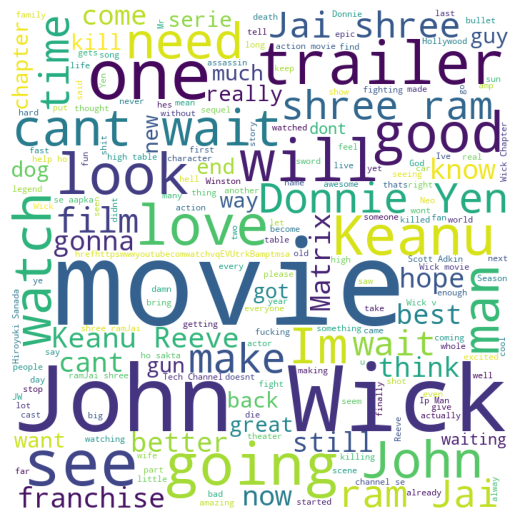

In [9]:
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(string_of_words) 

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Lemmatization

We have used POS TAGGING, which enhances Lemmatization

In [10]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(i):
    words_splitted = i.split()
    no_stopwords = [i for i in words_splitted if i not in stopwords.words("english")]
    no_stopwords = nltk.pos_tag(no_stopwords)
    List=[]
    for i in no_stopwords:
        a=(i[0],pos_tagger(i[1]))
        List.append(a)
       
    list_of_strings=[]
    for i in List:
        try: 
            list_of_strings.append(lemmatizer.lemmatize(i[0],i[1]))
        except:
            list_of_strings.append(lemmatizer.lemmatize(i[0]))
    return " ".join(list_of_strings)

In [12]:
comments['Lemmatized']=comments['Comment'].apply(lemmatizing)

In [13]:
comments

,Comment,Lemmatized
0,guys listen to me While youre milking this alr...,guy listen While youre milk already please add...
1,What else do you want to see in a movie like e...,What else want see movie like every one fun te...
2,On a constellation note its no coincidence it ...,On constellation note coincidence happen lion ...
3,Must of watched john wick a hunndred times al...,Must watch john wick hunndred time day long I ...
4,I really loved character of caine hes one of t...,I really love character caine hes one best Ive...
...,...,...
23619,Lets goo,Lets goo
23620,First,First
23621,First,First
23622,Yiss,Yiss


 # Vectorising using TFID

In [14]:
tfid = TfidfVectorizer(min_df=3)
X_vectorized = tfid.fit_transform(comments['Lemmatized']).toarray()
X_vectorized.shape

(23624, 4371)

# Creating target variable using Text blob polarity

In [15]:
def polarity(i):
    sentence=TextBlob(i)
    return sentence.sentiment[0]

comments['Polarity']=comments['Lemmatized'].apply(polarity)
comments

,Comment,Lemmatized,Polarity
0,guys listen to me While youre milking this alr...,guy listen While youre milk already please add...,-0.266667
1,What else do you want to see in a movie like e...,What else want see movie like every one fun te...,0.016667
2,On a constellation note its no coincidence it ...,On constellation note coincidence happen lion ...,-0.037778
3,Must of watched john wick a hunndred times al...,Must watch john wick hunndred time day long I ...,0.240000
4,I really loved character of caine hes one of t...,I really love character caine hes one best Ive...,0.750000
...,...,...,...
23619,Lets goo,Lets goo,0.000000
23620,First,First,0.250000
23621,First,First,0.250000
23622,Yiss,Yiss,0.000000


In [16]:
def CLASSES(i):
    if i<(-0.125):                          # Negative Class
        return 0
    elif (-0.125)<=i<=(0.125):             # Neutral Class
        return 1
    else :                                 # Positive Class
        return 2
    
comments['CLASS']=comments['Polarity'].apply(CLASSES)


# Here we have divide our classes as follows - 

0 - Negative Comment

1- Neutral Comment

2 - Positive Comment

In [17]:
comments

,Comment,Lemmatized,Polarity,CLASS
0,guys listen to me While youre milking this alr...,guy listen While youre milk already please add...,-0.266667,0
1,What else do you want to see in a movie like e...,What else want see movie like every one fun te...,0.016667,1
2,On a constellation note its no coincidence it ...,On constellation note coincidence happen lion ...,-0.037778,1
3,Must of watched john wick a hunndred times al...,Must watch john wick hunndred time day long I ...,0.240000,2
4,I really loved character of caine hes one of t...,I really love character caine hes one best Ive...,0.750000,2
...,...,...,...,...
23619,Lets goo,Lets goo,0.000000,1
23620,First,First,0.250000,2
23621,First,First,0.250000,2
23622,Yiss,Yiss,0.000000,1


<Axes: xlabel='Polarity', ylabel='Count'>

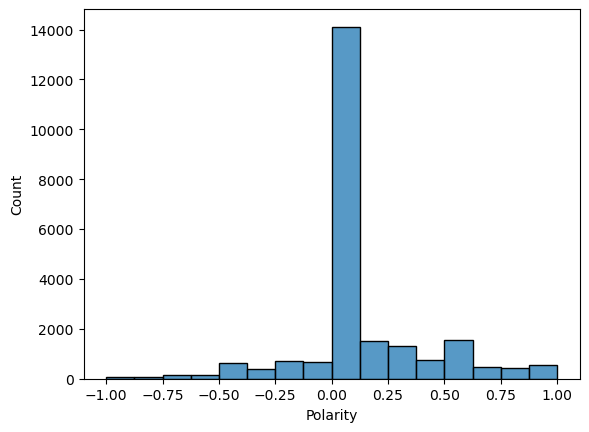

In [18]:
sns.histplot( comments['Polarity'],bins=16)

 Most of the values are in [0 - 0.125] (Polarity)

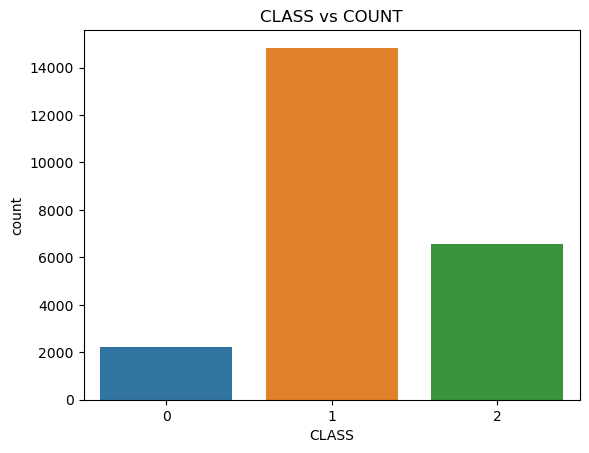

In [19]:
sns.countplot(comments,x='CLASS',)
plt.title("CLASS vs COUNT")
plt.show()

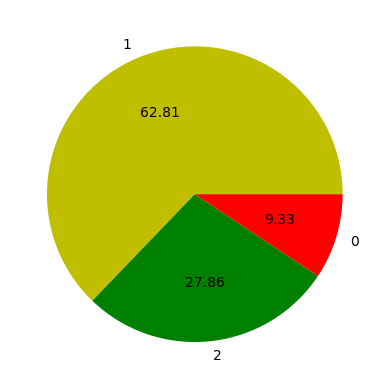

In [20]:
plt.pie(comments['CLASS'].value_counts(),autopct="%.2f",colors="ygr",labels=[1,2,0])
plt.show()

As we see our data is dominated by Neutral values, this makes our data Imbalanced

Hence to handle this we will use SMOTE technique

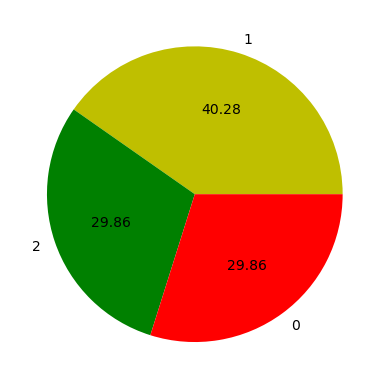

In [21]:
smote = SMOTE(k_neighbors=5,n_jobs=3,sampling_strategy={0:11000,2:11000})
X,y = smote.fit_resample(X_vectorized,comments['CLASS'])
plt.pie(y.value_counts(),autopct="%.2f",colors="ygr",labels=[1,2,0])
plt.show()

Now our data is balanced to some extent 

In [22]:
X.shape,y.shape

((36838, 4371), (36838,))

# Preparing data to feed for models

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

So now our data is ready to feed into the models

# MODELING

We will build the following models in this section :

1- KNN

2- NAIVE BAYES

3- DECISION TREE 

4- LOGISTIC REGRESSION


# KNN

In [24]:
for i in range(2,10):
    KNN= KNeighborsClassifier(n_neighbors=i,n_jobs=5)
    model_KNN = KNN.fit(X_train,y_train)
    y_pred = model_KNN.predict(X_test)
    print(i," = ",accuracy_score(y_test,y_pred))

2  =  0.7741585233441911
3  =  0.7862830256967065
4  =  0.7752442996742671
5  =  0.7808541440463265
6  =  0.7659247195077814
7  =  0.7704487875497648
8  =  0.7634817227651104
9  =  0.759500542888165


We found highest accuracy at k = 3

In [25]:
KNN= KNeighborsClassifier(n_neighbors=3,n_jobs=5)

model_KNN = KNN.fit(X_train,y_train)

y_pred = model_KNN.predict(X_test)

score_KNN = accuracy_score(y_test,y_pred)

print("Accuracy Score is : ",score_KNN)

print()

print(classification_report(y_test,y_pred))

Accuracy Score is :  0.7862830256967065

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      3397
           1       0.92      0.60      0.73      4383
           2       0.71      0.86      0.78      3272

    accuracy                           0.79     11052
   macro avg       0.80      0.81      0.79     11052
weighted avg       0.81      0.79      0.78     11052



# Naive Bayes

In [26]:
NB = MultinomialNB()

model_NB = NB.fit(X_train,y_train)

y_pred = model_NB.predict(X_test)

score_NB = accuracy_score(y_test,y_pred)

print("Accuracy Score is : ",score_NB)

print()

print(classification_report(y_test,y_pred))

Accuracy Score is :  0.8441006152732538

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3397
           1       0.79      0.86      0.82      4383
           2       0.87      0.78      0.82      3272

    accuracy                           0.84     11052
   macro avg       0.85      0.84      0.85     11052
weighted avg       0.85      0.84      0.84     11052



# Decision Tree

In [27]:
start= time.time()
DT = DecisionTreeClassifier(random_state=20)

skf = StratifiedKFold(n_splits=3)

GS = GridSearchCV(DT, param_grid={'criterion':['gini','entropy'],'max_depth':[40,80,120,160,200],'max_features':[2000,3000,4000],'min_samples_split':[2,3,4]},n_jobs=5,cv=skf)

model_DT = GS.fit(X_train,y_train)

y_pred = model_DT.predict(X_test)

score_DT = model_DT.best_score_

print("Best parameters are  : ",model_DT.best_params_)

print()

print("Accuracy Score is : ",score_DT)

print()

print(classification_report(y_test,y_pred))

stop = time.time()
print(stop - start)

Best parameters are  :  {'criterion': 'gini', 'max_depth': 200, 'max_features': 2000, 'min_samples_split': 2}

Accuracy Score is :  0.9097186004863751

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3397
           1       0.90      0.93      0.91      4383
           2       0.92      0.89      0.90      3272

    accuracy                           0.92     11052
   macro avg       0.92      0.92      0.92     11052
weighted avg       0.92      0.92      0.92     11052

2802.710844516754


we will build the above BEST Decision tree

In [29]:
DT = DecisionTreeClassifier(random_state=20,criterion='gini',max_depth=200,max_features=3000)

model_DT = DT.fit(X_train,y_train)

y_pred = model_DT.predict(X_test)

score_DT = accuracy_score(y_test,y_pred)

print("Training score = ",model_DT.score(X_train,y_train))

print("Testing score = ",model_DT.score(X_test,y_test))
print()

print("Accuracy Score is : ",score_DT)

print()

print(classification_report(y_test,y_pred))

Training score =  0.9900721321647405
Testing score =  0.9264386536373507

Accuracy Score is :  0.9264386536373507

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3397
           1       0.91      0.93      0.92      4383
           2       0.93      0.90      0.92      3272

    accuracy                           0.93     11052
   macro avg       0.93      0.93      0.93     11052
weighted avg       0.93      0.93      0.93     11052



# Logistic Regression

In [30]:
LR =LogisticRegression()

model_LR = LR.fit(X_train,y_train)

y_pred = model_LR.predict(X_test)

score_LR = accuracy_score(y_test,y_pred)

print("Accuracy Score is : ",score_LR)

print()

print(classification_report(y_test,y_pred))

Accuracy Score is :  0.8911509229098805

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3397
           1       0.82      0.94      0.88      4383
           2       0.94      0.82      0.88      3272

    accuracy                           0.89     11052
   macro avg       0.91      0.89      0.89     11052
weighted avg       0.90      0.89      0.89     11052



# Voting Classifier

As we see Logistic regression and Decision tree gives Good accuracy we will build a voting classifier with 2 Decision Tree and 2 logistic regression models

In [31]:
LR =LogisticRegression()

DT = DecisionTreeClassifier(random_state=20,criterion='gini',max_depth=200,max_features=3000)

VC= VotingClassifier(estimators=[('LR1',LR),('LR2',LR),('DT1',DT),('DT2',DT)],n_jobs=5)

model_VC = VC.fit(X_train,y_train)

print("Training score = ",model_VC.score(X_train,y_train))

print("Testing score = ",model_VC.score(X_test,y_test))

y_pred = model_VC.predict(X_test)

score_VC = accuracy_score(y_test,y_pred)

print("Accuracy Score is : ",score_VC)

print()

print(classification_report(y_test,y_pred))

Training score =  0.9426045140774063
Testing score =  0.9023706116539992
Accuracy Score is :  0.9023706116539992

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3397
           1       0.85      0.94      0.89      4383
           2       0.97      0.78      0.86      3272

    accuracy                           0.90     11052
   macro avg       0.91      0.90      0.90     11052
weighted avg       0.91      0.90      0.90     11052



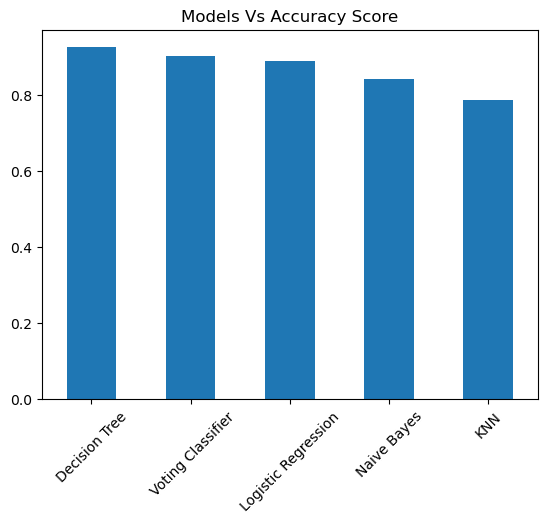

In [32]:
models = [score_KNN,score_NB,score_DT,score_LR,score_VC]

index = ['KNN','Naive Bayes', 'Decision Tree','Logistic Regression',' Voting Classifier']

scores = pd.Series(data = models, index = index )

scores.sort_values(ascending=False).plot(kind='bar')
plt.title("Models Vs Accuracy Score")
plt.xticks(rotation = 45)
plt.show()

After building Voting Classifier still it doesent gives more accuracy than a single decision tree

So we will use Decision Tree as our model algorithm which is less computationally expensive than Voting classifiers

Ensembling techniques we very highly computational and demanded a lot of time, so we excluded it

# MODEL

Training score =  0.9900721321647405
Testing score =  0.9264386536373507

Accuracy Score is :  0.9264386536373507



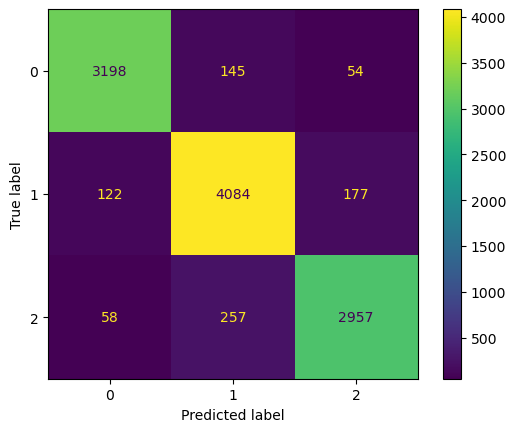



              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3397
           1       0.91      0.93      0.92      4383
           2       0.93      0.90      0.92      3272

    accuracy                           0.93     11052
   macro avg       0.93      0.93      0.93     11052
weighted avg       0.93      0.93      0.93     11052



In [33]:
DT = DecisionTreeClassifier(random_state=20,criterion='gini',max_depth=200,max_features=3000)

model_DT = DT.fit(X_train,y_train)

y_pred = model_DT.predict(X_test)

score_DT = accuracy_score(y_test,y_pred)

print("Training score = ",model_DT.score(X_train,y_train))

print("Testing score = ",model_DT.score(X_test,y_test))

print()

print("Accuracy Score is : ",score_DT)

print()

matrix = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

print()

print()

print(classification_report(y_test,y_pred))

# INSIGHTS :

Our model is 6 % overfitted which is acceptable.

and has a good accuracy of 92 % 

# CONCLUSION :

We will use a Decision tree model which has following parameters : {'criterion': 'gini', 'max_depth': 200, 'max_features': 3000, 'min_samples_split': 2}

In [34]:
STOP = time.time()
print(f"Total time required for the notebook to run is {(STOP - START)/60} minutes")

Total time required for the notebook to run is 57.950461769104 minutes
